In [2]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve


In [3]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

In [4]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
# x = df.loc[:, features].values
x=df.drop('price_range',axis=1).values

# y = df.loc[:, target].values
y = df[target].values

# Normalize the data

# Min Max
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

# Z-Score
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns = features)
# normalized_zscore = pd.concat([normalized_zscore, df[[target]]], axis = 1)


Decision Tree - Min Max


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


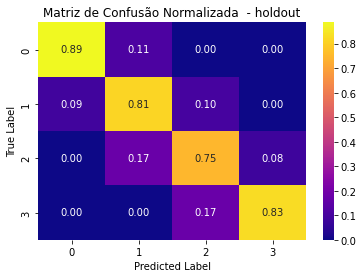

Accuracy: 0.8183333333333334
F1 Score: 0.8199146544443574
Precision: 0.8235359232941827
Recall: 0.8183333333333334
Specificity: 0.8183333333333334


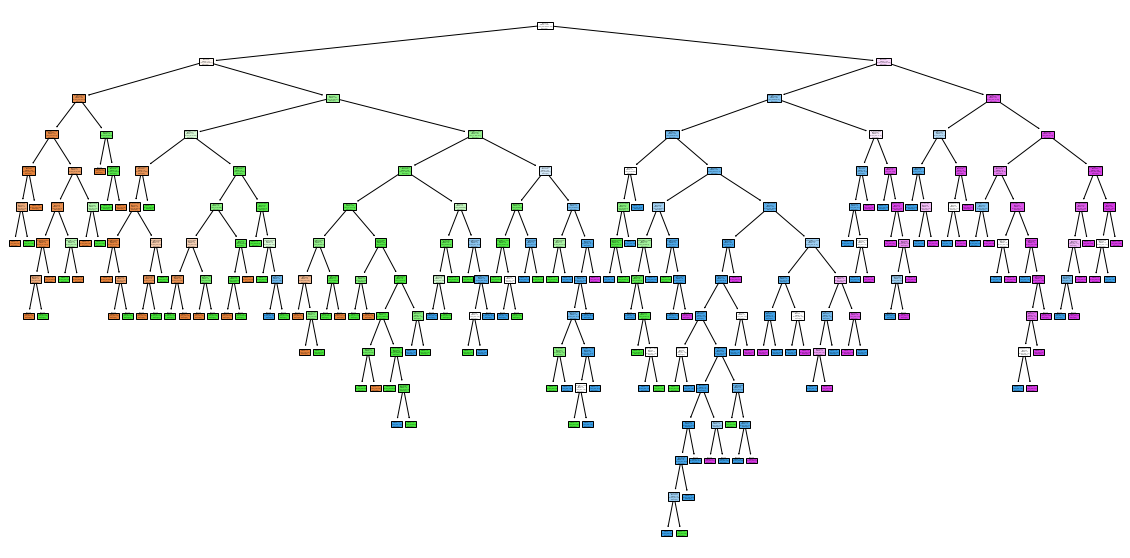

c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


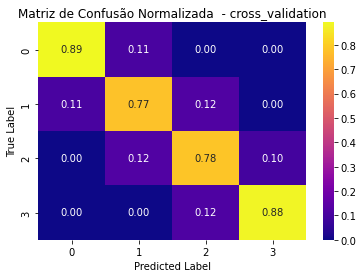

Accuracy: 0.8264999999999999
F1 Score: 0.8328538293637039
Precision: 0.833302766818967
Recall: 0.8325
Specificity: 0.8325


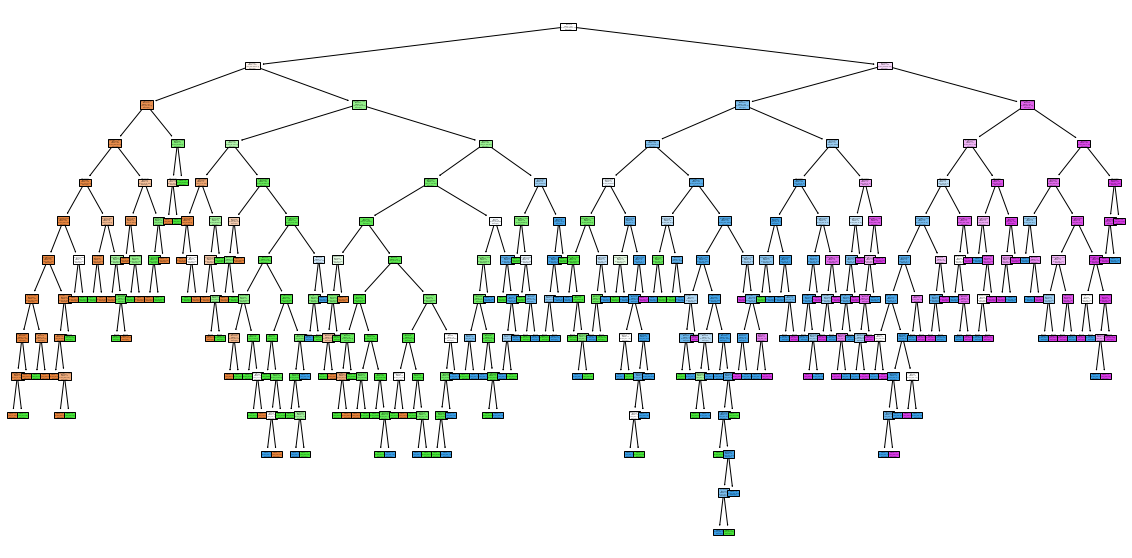

Decision Tree - Z-Score


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


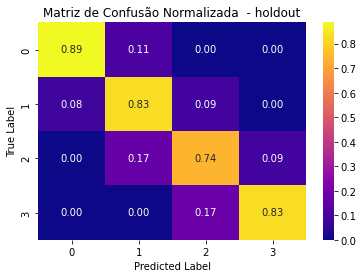

Accuracy: 0.82
F1 Score: 0.8212894202967075
Precision: 0.8244698483758998
Recall: 0.82
Specificity: 0.82


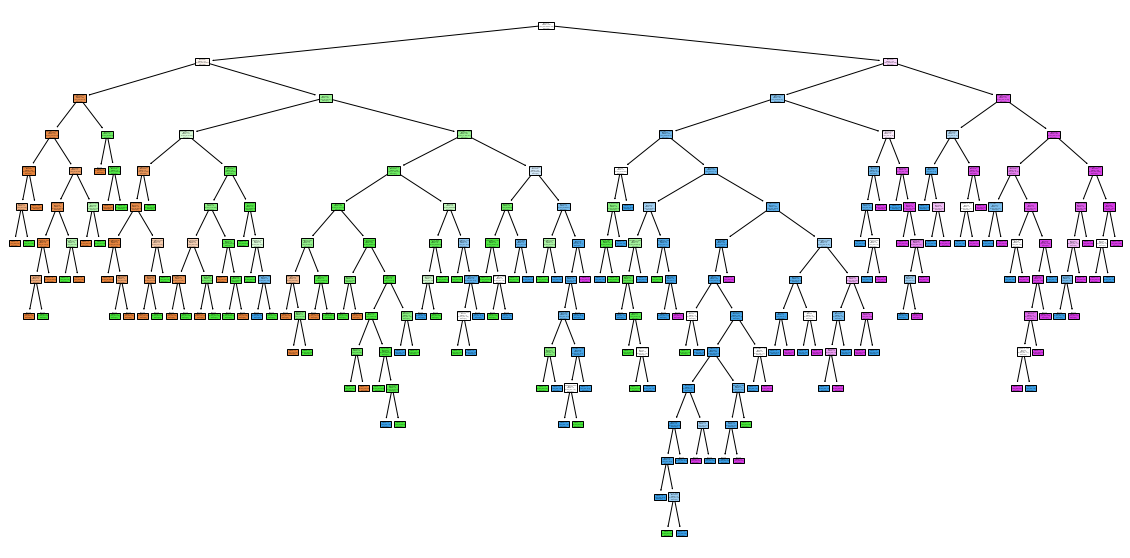

c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


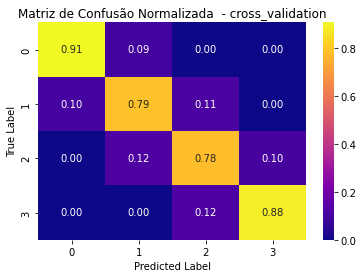

Accuracy: 0.8354999999999999
F1 Score: 0.8375947406910039
Precision: 0.8377293454978088
Recall: 0.8374999999999999
Specificity: 0.8374999999999999


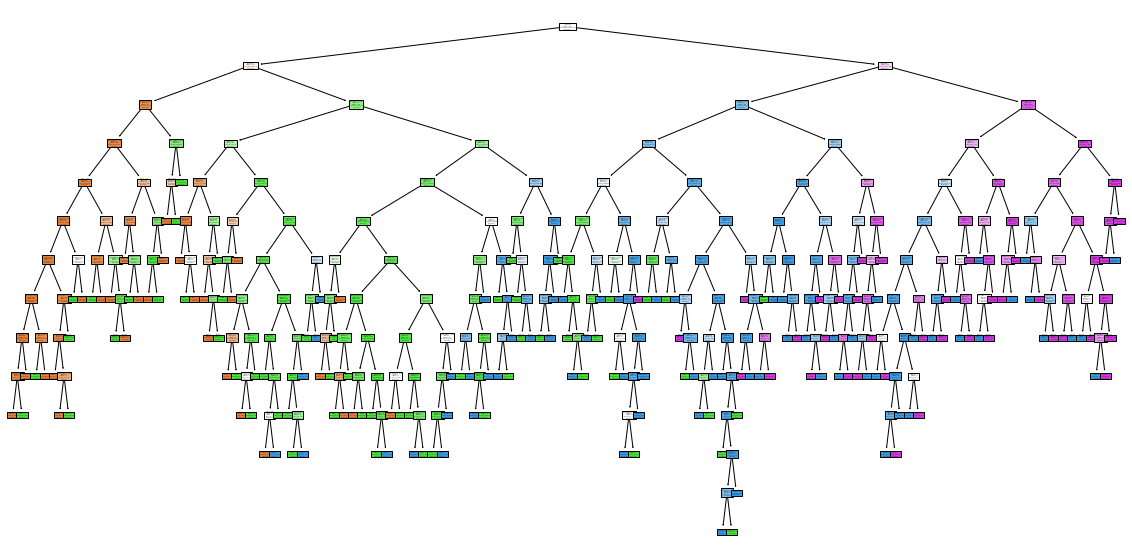

In [8]:
def apply_decision_tree(normalized_data, type_split, show_metrics=True, normalized_conf_matrix=True):
    # Inicializar e treinar o modelo de Árvore de Decisão
    # clf = DecisionTreeClassifier(random_state=42)
    clf = DecisionTreeClassifier(max_leaf_nodes=256)
    
    if type_split == 'holdout':
        # Divisão dos dados em treino e teste
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        x_train, x_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=0, stratify=y)
        clf.fit(x_train, y_train)
        # Prever os resultados para o conjunto de teste
        y_pred = clf.predict(x_test)
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        specificity = recall_score(y_test, y_pred, pos_label=0, average='macro')
        # Plotar a matriz de confusão
        conf_matrix = confusion_matrix(y_test, y_pred)
        
    elif type_split == 'cross_validation':
        sk_folds = StratifiedKFold(n_splits=10)
        scores = cross_val_score(clf, normalized_data, y, cv=sk_folds)
        y_pred_cv = cross_val_predict(clf, normalized_data, y, cv=sk_folds)
        clf.fit(normalized_data, y)
        # Calcular métricas
        accuracy = np.mean(scores)
        precision = precision_score(y, y_pred_cv, average='macro')
        recall = recall_score(y, y_pred_cv, average='macro')
        f1 = f1_score(y, y_pred_cv, average='macro')
        specificity = recall_score(y, y_pred_cv, pos_label=0, average='macro')
        # Plotar a matriz de confusão
        conf_matrix = confusion_matrix(y, y_pred_cv)

    if show_metrics:
        if normalized_conf_matrix:
            # Normalizando a matriz de confusão
            cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
            sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='plasma')
            plt.title('Matriz de Confusão Normalizada ' + ' - ' + type_split)
        else:
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='plasma')
            plt.title('Matriz de Confusão ' + ' - ' + type_split)
        
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
        print('Accuracy:', accuracy)
        print('F1 Score:', f1)
        print('Precision:', precision)
        print('Recall:', recall)
        print('Specificity:', specificity)
        
    
    # Plotando a árvore de decisão
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf, filled=True, feature_names=features, class_names=True)
    plt.show()
    
print ('Decision Tree - Min Max')
apply_decision_tree(normalized_minmax, 'holdout', show_metrics=True, normalized_conf_matrix=True)
apply_decision_tree(normalized_minmax, 'cross_validation', show_metrics=True, normalized_conf_matrix=True)
print ('Decision Tree - Z-Score')
apply_decision_tree(normalized_zscore, 'holdout', show_metrics=True, normalized_conf_matrix=True)
apply_decision_tree(normalized_zscore, 'cross_validation', show_metrics=True, normalized_conf_matrix=True)


In [6]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
# clf.fit(x, y)
clf.fit(x_train, y_train)

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=True)
plt.show()

predictions = clf.predict(x_test)
print(predictions)

result = clf.score(x_test, y_test)
print('Accuracy: ', result)

NameError: name 'x_train' is not defined